Zad. 4

Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) odsetek
odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒
2 w przypadku weryfikacji
zgodności z rozkładem 𝜒
2 o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu
𝜒
2 o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝜒
2 o 𝑘 st. swobody.
Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących rozmiary testów z
uwzględnieniem:
- liczby danych,
- liczby klas,
- liczby stopni swobody generowanego rozkładu.

In [6]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

Stworzyłem funkcja, która przyjmuje 3 argumenty jakimi są ilość klas, ilosc danych i stopnie swobody. Zwraca ona ilosc 0 lub 1 w zależności czy odrzucamy h0 czy nie.

In [7]:
def simulate_chi_squared(num_classes, num_samples, df):
    # generuje dane z rozkladuc hi2
    data = np.random.chisquare(df, size=num_samples)

    # przypisywanie danych do klas na podstawie ich wartości
    class_labels = np.floor(data / (2*df) * num_classes).astype(int)
    class_labels[class_labels >= num_classes] = num_classes - 1 

    # obliczanie ilosci danych w kazdej klasie
    observed_counts = np.bincount(class_labels, minlength=num_classes)

    # obliczanie oczekiwanych częstości na podstawie założonego rozkładu chi2
    expected_probs = chi2.cdf((np.arange(1, num_classes+1) / num_classes) * 2*df, df) - chi2.cdf((np.arange(0, num_classes) / num_classes) * 2*df, df)

    # przeskalowanie oczekiwanych częstości do liczby próbek
    expected_counts = expected_probs * num_samples

    # epsilon w celu unikniecia dzielenia przez 0.
    expected_counts += 1e-10

    # liczenie statystyki
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)

    # wartosc p
    p_val = 1 - chi2.cdf(chi2_stat, df=num_classes-1)

    # odrzucamy czy nie hipoteze h0
    reject_null = p_val < 0.05

    return reject_null

Funkcja główna, która wykonuje funkcję przeprowadzania testu w pętli z wymaganymi parametrami.

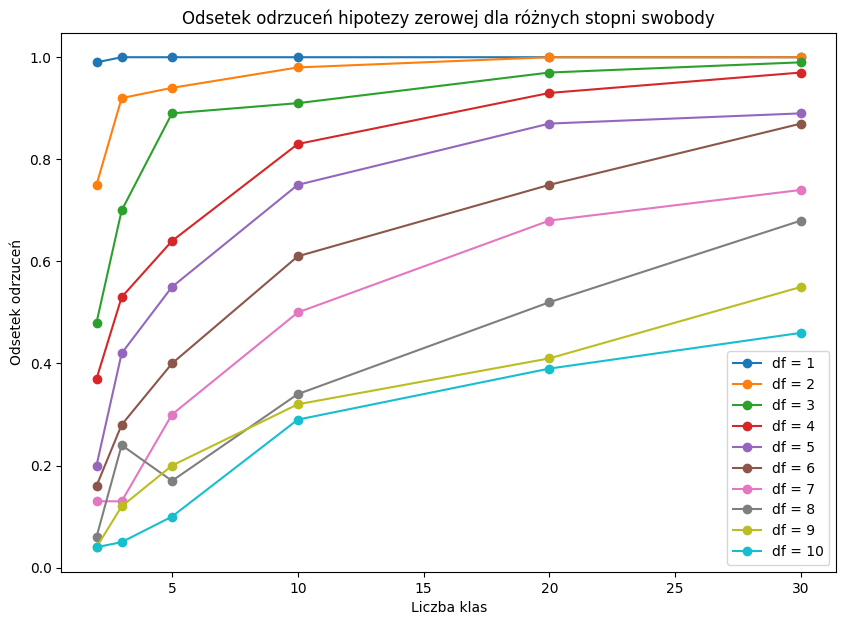

In [8]:
def main():
    num_classes_list = [2, 3, 5, 10, 20, 30]  # liczby klas, które wybralem
    num_samples = 100  # liczebność danych
    df_list = range(1, 11)  # ilosci stopni swobody

    plt.figure(figsize=(10, 7))

    for df in df_list:
        
        rejection_rates = []
        for num_classes in num_classes_list:
            rejections = []
            for _ in range(100):
                reject_null = simulate_chi_squared(num_classes, num_samples, df)
                rejections.append(reject_null)

            # Obliczanie odsetka odrzuceń
            rejection_rate = np.mean(rejections)
            rejection_rates.append(rejection_rate)

        # Dodanie linii do wykresu dla danego stopnia swobody
        plt.plot(num_classes_list, rejection_rates, marker='o', label=f'df = {df}')

    plt.title('Odsetek odrzuceń hipotezy zerowej dla różnych stopni swobody')
    plt.xlabel('Liczba klas')
    plt.ylabel('Odsetek odrzuceń')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()



Dla niższych stopni swobody (np. df = 1), obserwujemy stromy wzrost odsetka odrzuceń wraz ze wzrostem liczby klas.
Wraz ze wzrostem stopni swobody, ten trend staje się mniej stromy.
Wyższe stopnie swobody pokazują ogólnie wyższy odsetek odrzuceń w porównaniu do niższych stopni.
Wydaje się, że istnieje punkt przegięcia, po którym zwiększanie liczby klas nie zwiększa już znacząco odsetka odrzuceń; ten punkt przesuwa się w prawo (w kierunku większej liczby klas) wraz ze wzrostem stopni swobody.

Te obserwacje sugerują, że zarówno liczba klas, jak i stopnie swobody rozkładu odgrywają znaczące role w określaniu błędów I rodzaju (fałszywe pozytywy) w testach χ2